This is a beamforming project I am working on for my course in digital signal processing (ECSE 512)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp

In [3]:
NUM_SENSORS = 8             # Number of sensors in the array
SPEED_OF_SOUND = 1500       # Speed of sound in water (m/s)
FREQUENCY = 1000            # Frequency of the incoming signal (Hz)
SAMPLE_RATE = 5000          # Sampling rate (Hz)
DURATION = 0.01             # Signal duration in seconds
ANGLE_OF_ARRIVAL = 30       # Angle of arrival in degrees
NOISE_LEVEL = 0.2           # Noise amplitude

WAVELENGTH = SPEED_OF_SOUND / FREQUENCY      
SENSOR_SPACING = WAVELENGTH / 2
TIME = np.arange(0, DURATION, 1 / SAMPLE_RATE)

In [4]:
# Generate incoming signal
signal = chirp(TIME, f0=FREQUENCY, f1=FREQUENCY, t1=DURATION, method='linear')

In [5]:
# Calculate delay for each sensor based on the angle of arrival
angle_rad = np.deg2rad(ANGLE_OF_ARRIVAL)
delays = (SENSOR_SPACING * np.arange(NUM_SENSORS) * np.sin(angle_rad)) / SPEED_OF_SOUND
delays_samples = (delays * SAMPLE_RATE).astype(int) 

In [6]:
# Generate received signals with added noise
received_signals = np.zeros((NUM_SENSORS, len(TIME)))
for i in range(NUM_SENSORS):
    delay = delays_samples[i]
    received_signals[i, delay:delay+len(signal)-delay] = signal[:len(signal)-delay]
    received_signals[i] += NOISE_LEVEL * np.random.randn(len(TIME))

In [7]:
# Delay-and-Sum Beamforming
beamformed_signal = np.zeros(len(TIME))
for i in range(NUM_SENSORS):
    delay = delays_samples[i]
    beamformed_signal += np.roll(received_signals[i], -delay)

beamformed_signal /= NUM_SENSORS

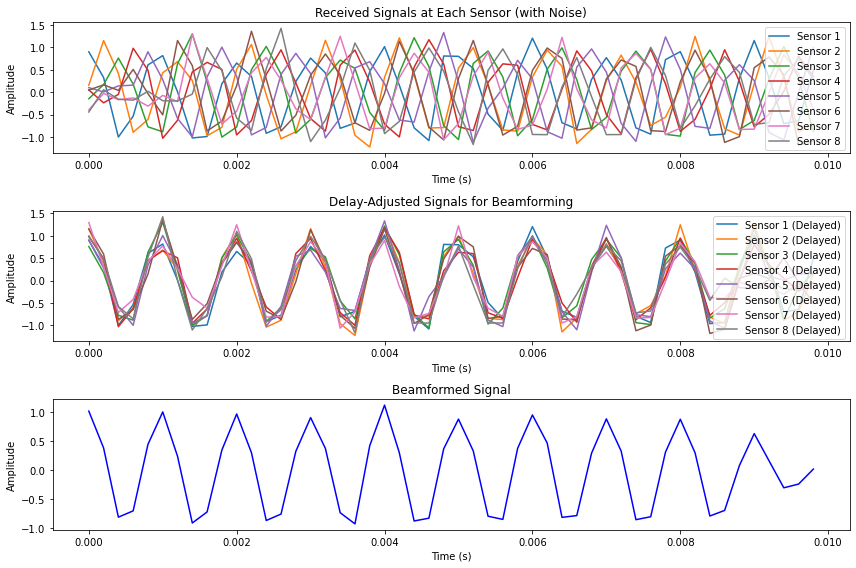

In [10]:
# Plotting results
plt.figure(figsize=(12, 8))

# Plot original received signals
plt.subplot(3, 1, 1)
plt.title("Received Signals at Each Sensor (with Noise)")
for i in range(NUM_SENSORS):
    plt.plot(TIME, received_signals[i], label=f"Sensor {i+1}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# Plot individual delayed signals
plt.subplot(3, 1, 2)
plt.title("Delay-Adjusted Signals for Beamforming")
for i in range(NUM_SENSORS):
    delay = delays_samples[i] / SAMPLE_RATE
    plt.plot(TIME, np.roll(received_signals[i], -delays_samples[i]), label=f"Sensor {i+1} (Delayed)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# Plot the beamformed signal
plt.subplot(3, 1, 3)
plt.title("Beamformed Signal")
plt.plot(TIME, beamformed_signal, color='blue')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()

We seek to implement the 3D wave equation: $\frac{\partial}

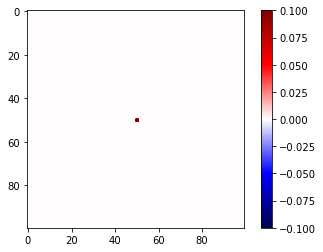